# Autorzy
- Mateusz Łopaciński
- Mateusz Mazur

# Zadanie 1
## Wczytanie danych
W pierwszej kolejności wczytamy dane ze zbiorów danych, na których będziemy pracować

In [26]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

column_names = ["x", "y", "cluster"]
file_paths = glob.glob("data/*.txt")

dfs = {}

for file_path in file_paths:
    file_name = file_path.split("/")[-1].split(".")[0]
    dfs[file_name] = pd.read_csv(file_path, names=column_names)

Zobaczmy, czy dane zostały prawidłowo wczytane (czy zgadzają się typy danych)

**Zbiór blobs**

In [27]:
dfs['blobs'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        500 non-null    float64
 1   y        500 non-null    float64
 2   cluster  500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


**Zbiór circles**

In [28]:
dfs['circles'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        500 non-null    float64
 1   y        500 non-null    float64
 2   cluster  500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


**Zbiór ellipses**

In [29]:
dfs['ellipses'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        500 non-null    float64
 1   y        500 non-null    float64
 2   cluster  500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


**Zbiór moons**

In [30]:
dfs['moons'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        500 non-null    float64
 1   y        500 non-null    float64
 2   cluster  500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


## Normalizacja danych liczbowych

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

Xs = {}

for key, df in dfs.items():
    X = df.drop('cluster', axis=1)
    Xs[key] = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

**Zbiór blobs**

In [32]:
dfs['blobs'].head()

x         y  cluster
0  1.103182  4.705777        0
1 -1.932846  3.642251        2
2 -2.034422  1.866002        2
3  1.616402  2.686831        0
4 -0.960010  4.492566        0

**Zbiór circles**

In [33]:
dfs['circles'].head()

x         y  cluster
0 -0.667240  0.767885        0
1  0.400662  0.059620        1
2  0.363861  0.373178        1
3  0.078146 -0.486274        1
4  0.298390 -0.553928        1

**Zbiór ellipses**

In [34]:
dfs['ellipses'].head()

x         y  cluster
0  1.730207 -1.848657        2
1  0.359788 -0.337610        2
2 -2.981336  3.080587        1
3  2.386856 -2.842995        2
4 -3.315642  0.656019        0

**Zbiór moons**

In [35]:
dfs['moons'].head()

x         y  cluster
0  0.669694 -0.434326        1
1  1.407503 -0.464530        1
2  0.848534  0.416112        0
3  0.450751  0.802704        0
4  1.970001  0.167788        1

## Prezentacja klastrów na wykresach

### Wykresy klastrów dla poszczególnych zbiorów danych

Pomocnicza funkcja, rysująca wykresy

In [40]:
def plot_clusters(df, title):
    plt.figure(figsize=(10, 8))
    plt.scatter(df['x'], df['y'], c=df['cluster'])
    plt.title(title)
    plt.show()

Wykresy, przedstawiające rozmieszczenie klastrów dla wszystkich zbiorów

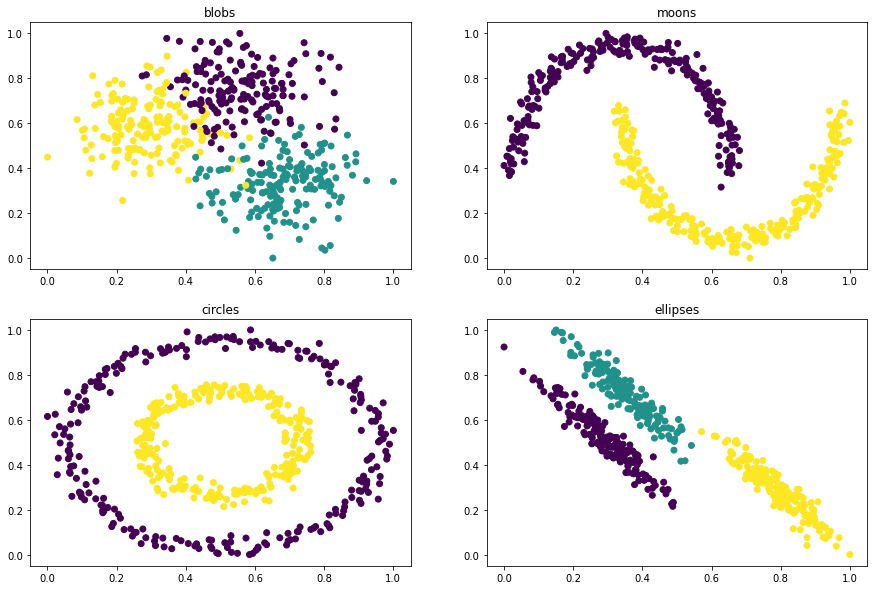

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, (key, df) in enumerate(dfs.items()):
    ax = axs[i // 2, i % 2]
    ax.scatter(Xs[key]['x'], Xs[key]['y'], c=df['cluster'])
    ax.set_title(key)

### Wspólny wykres klastrów dla wszystkich zbiorów danych

Pomocnicza funkcja, rysująca wszystkie klastry na jednym wykresie

In [42]:
def plot_all_clusters(dfs, title):
    plt.figure(figsize=(10, 8))
    for key, df in dfs.items():
        plt.scatter(Xs[key]['x'], Xs[key]['y'], label=key)
    plt.title(title)
    plt.legend()
    plt.show()

Wspólny wykres

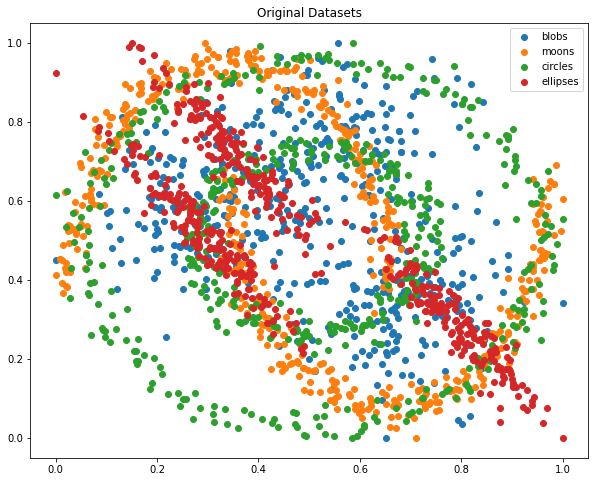

In [43]:
plot_all_clusters(dfs, 'Original Datasets')

## Analiza algorytmów klasteryzacji

### Algorytm k-means

Pomocnicza funkcja, rysująca rezultat klasteryzacji, dokonanej przy pomocy algorytmu k-means

In [54]:
from sklearn.cluster import KMeans

def k_means(X, n_clusters, ax=None):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    
    if ax is plt:
        plt.figure(figsize=(10, 8))
        
    ax.scatter(X['x'], X['y'], c=labels)
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')
    
    if ax is plt:
        ax.title(f'K-Means Clustering with {n_clusters} clusters')
        ax.show()
    else:
        ax.set_title(f'K-Means Clustering with {n_clusters} clusters')

Wykresy przedstawiające rezultaty klasteryzacji dla algorytmu k-means oraz różnych liczb klastrów kolejno dla wszystkich analizowanych w tym zadaniu zbiorów danych

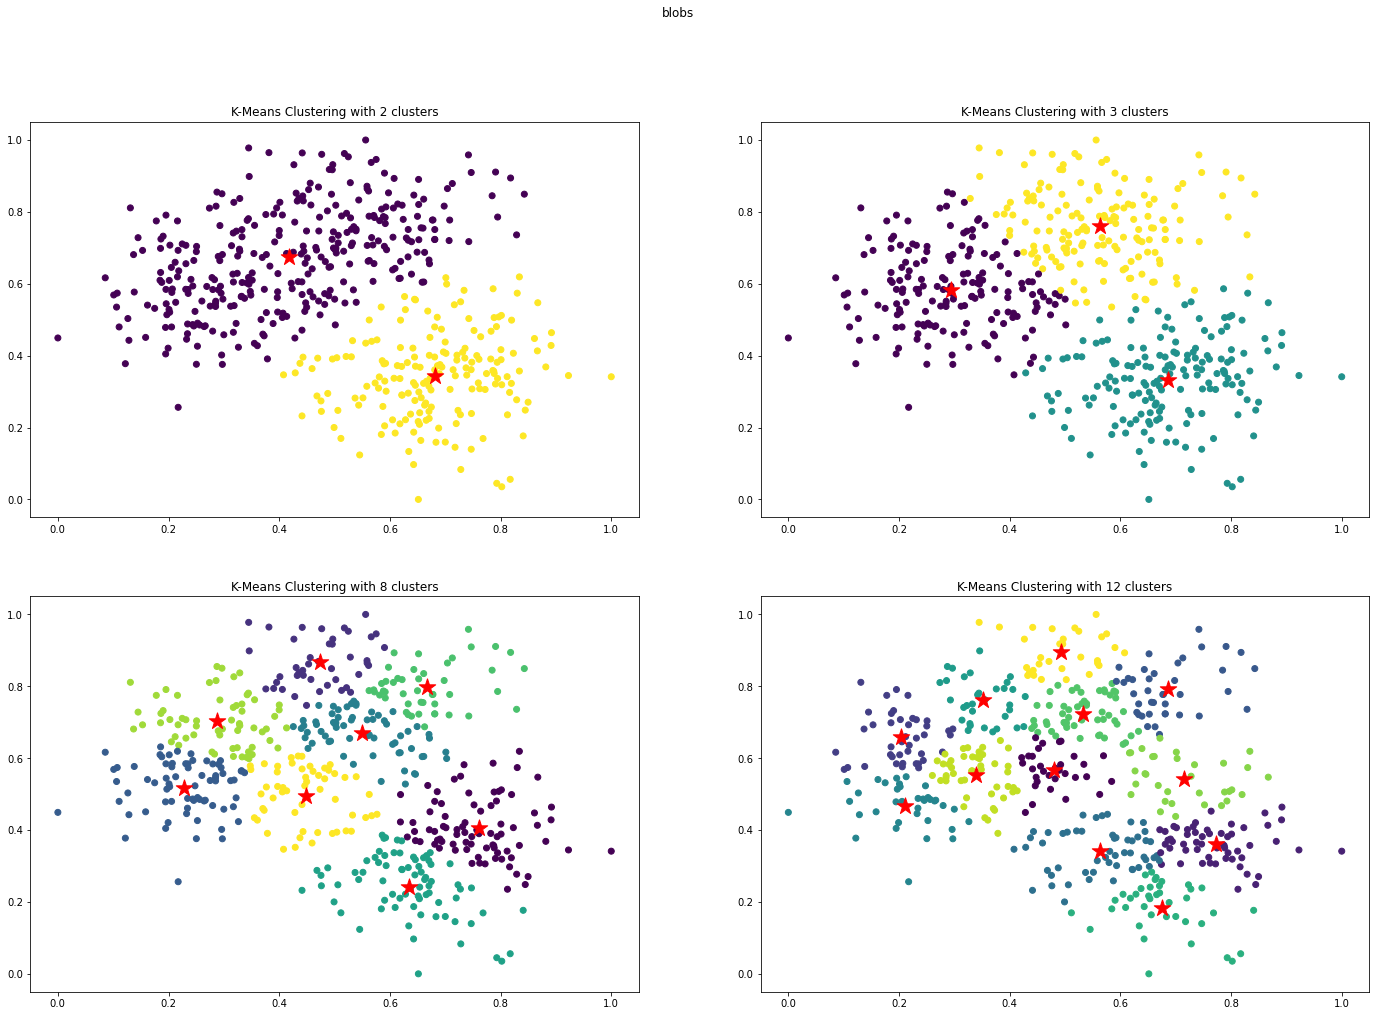

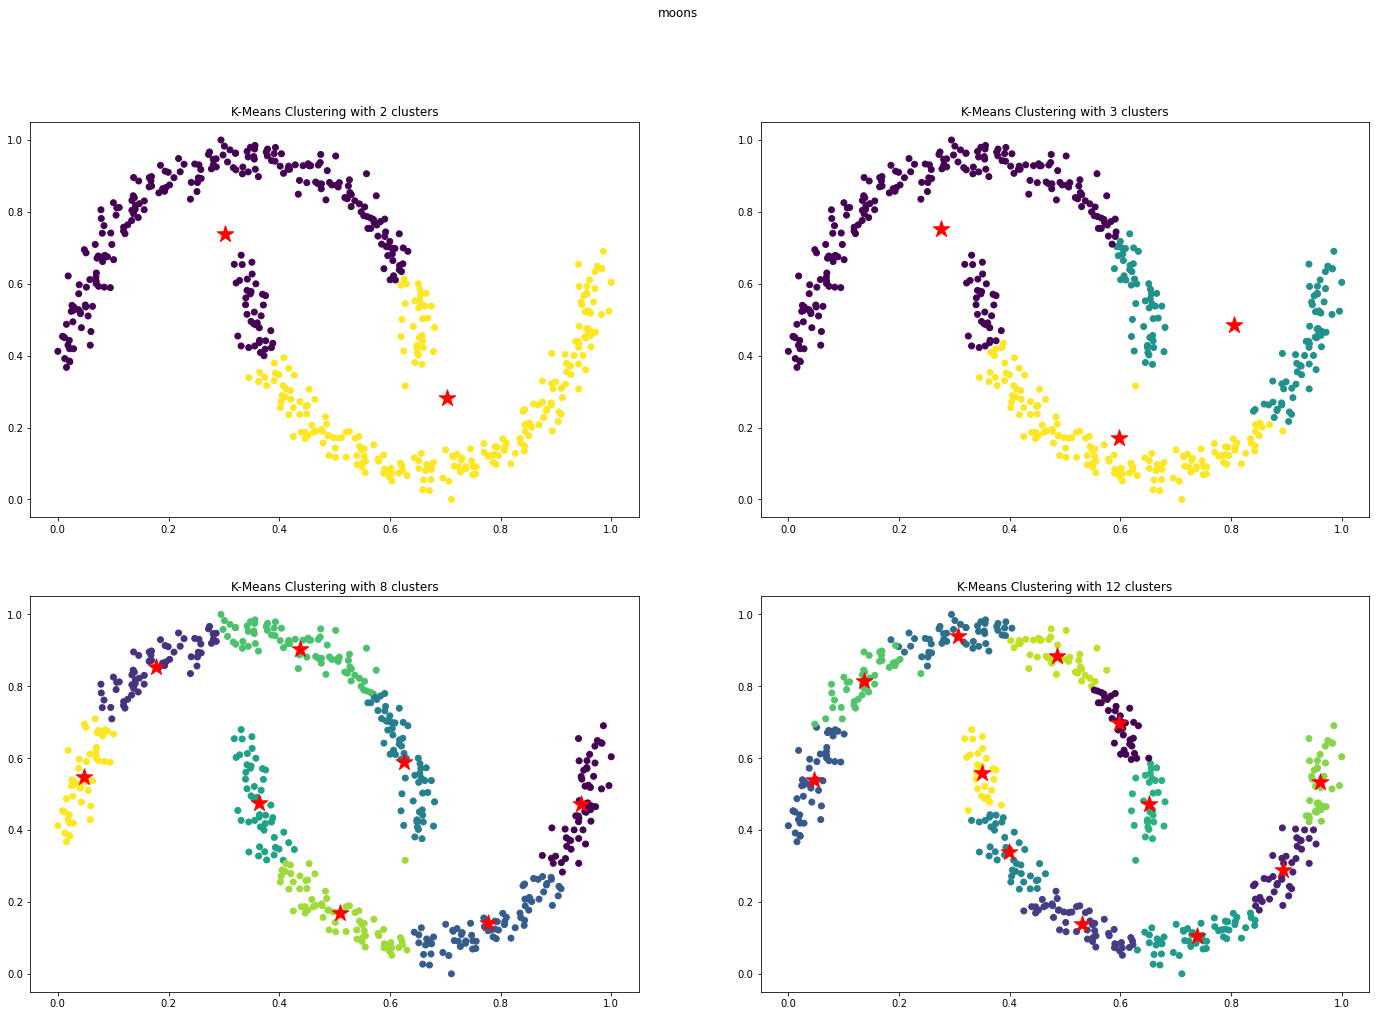

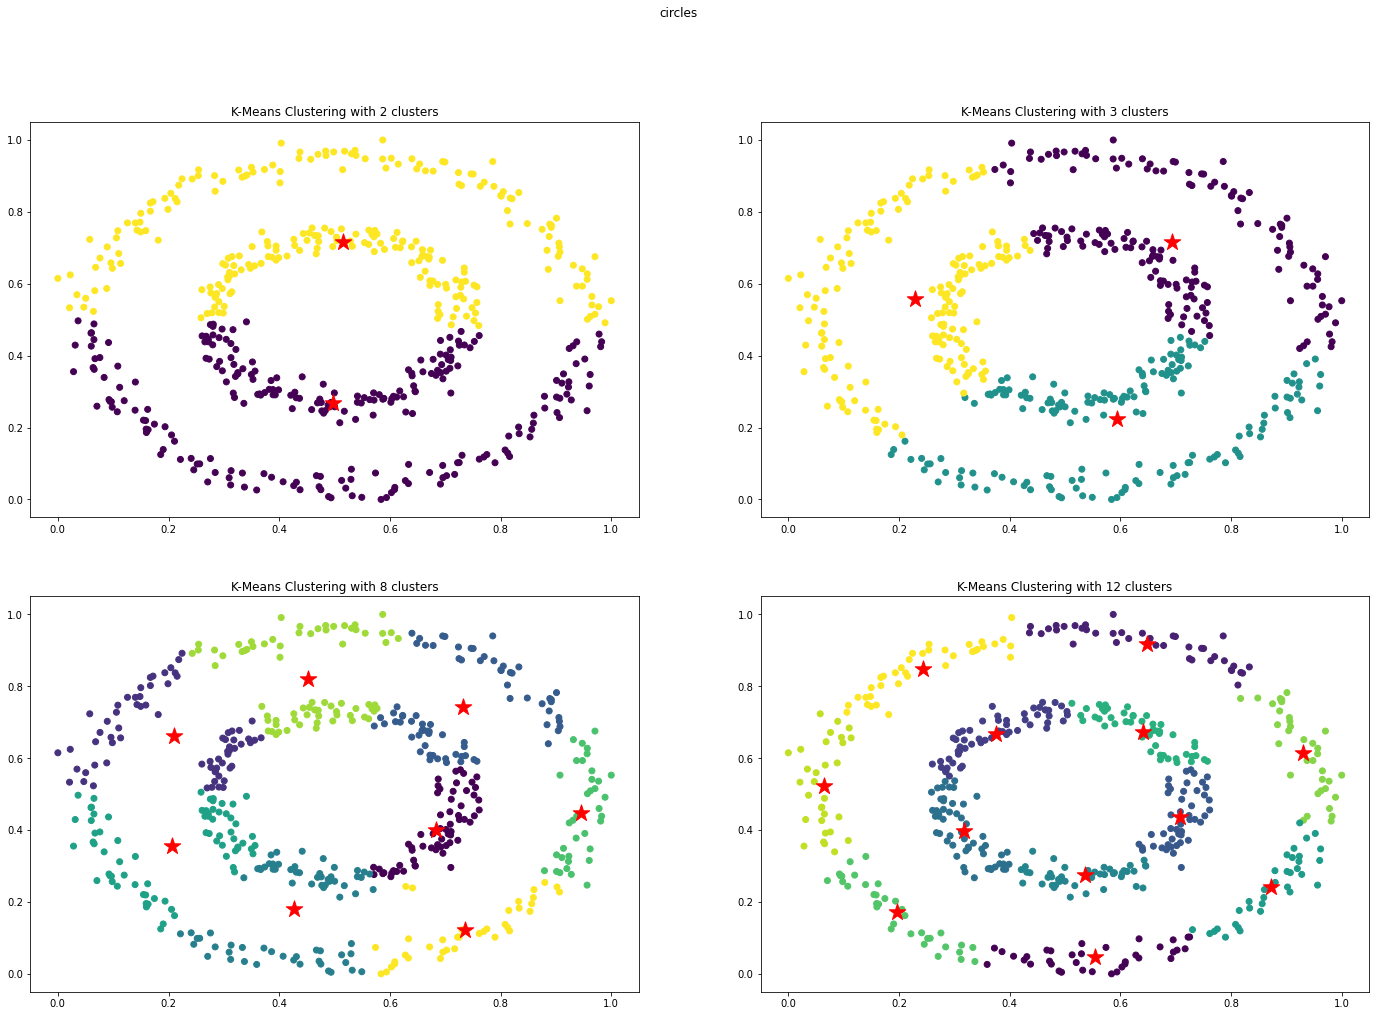

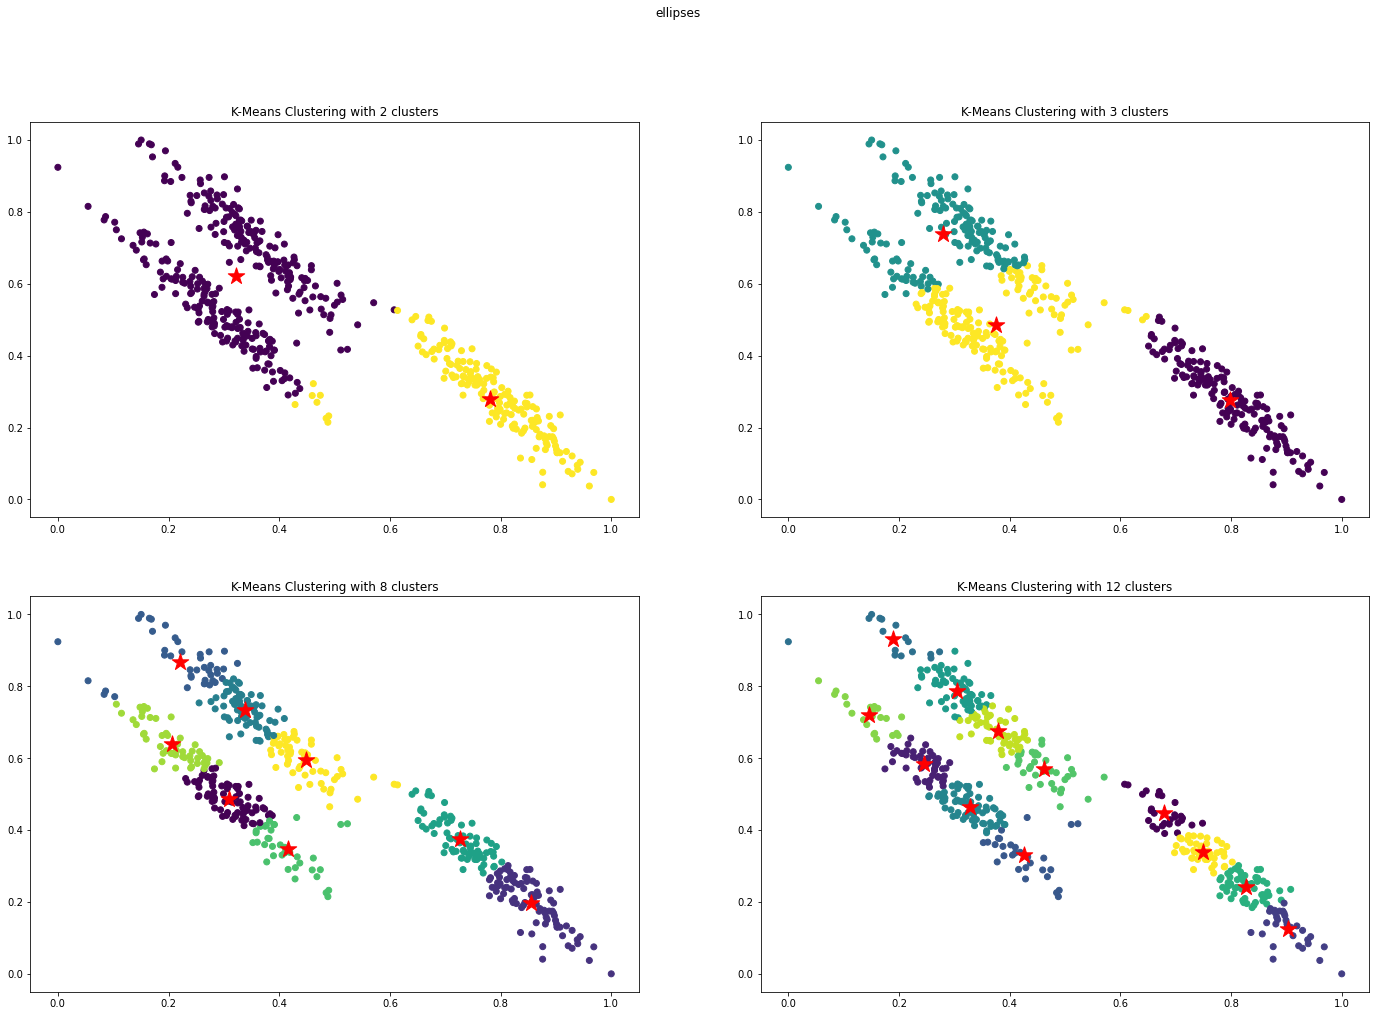

In [55]:
clusters = [2, 3, 8, 12]

for i, (key, df) in enumerate(dfs.items()):
    fig, axs = plt.subplots(2, 2, figsize=(24, 16))
    
    fig.suptitle(key)
    
    for j, n_clusters in enumerate(clusters):
        ax = axs[j // 2, j % 2]
        k_means(Xs[key], n_clusters, ax=ax)

### Algorytm DBSCAN

Pomocnicza funkcja, rysująca rezultat klasteryzacji, dokonanej przy pomocy algorytmu DBSCAN

In [60]:
from sklearn.cluster import DBSCAN

def dbscan(X, eps, min_samples, ax=None):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(X)
    labels = dbscan.labels_
    
    if ax is plt:
        plt.figure(figsize=(10, 8))
        
    ax.scatter(X['x'], X['y'], c=labels)
    
    if ax is plt:
        ax.title(f'DBSCAN Clustering with eps={eps} and min_samples={min_samples}')
        ax.show()
    else:
        ax.set_title(f'DBSCAN Clustering with eps={eps} and min_samples={min_samples}')

Wykresy przedstawiające rezultaty klasteryzacji dokonanej, przy pomocy algorytmu DBSCAN, dla różnych wartości parametrów `eps` i `min_samples` kolejno dla wszystkich analizowanych w tym zadaniu zbiorów.

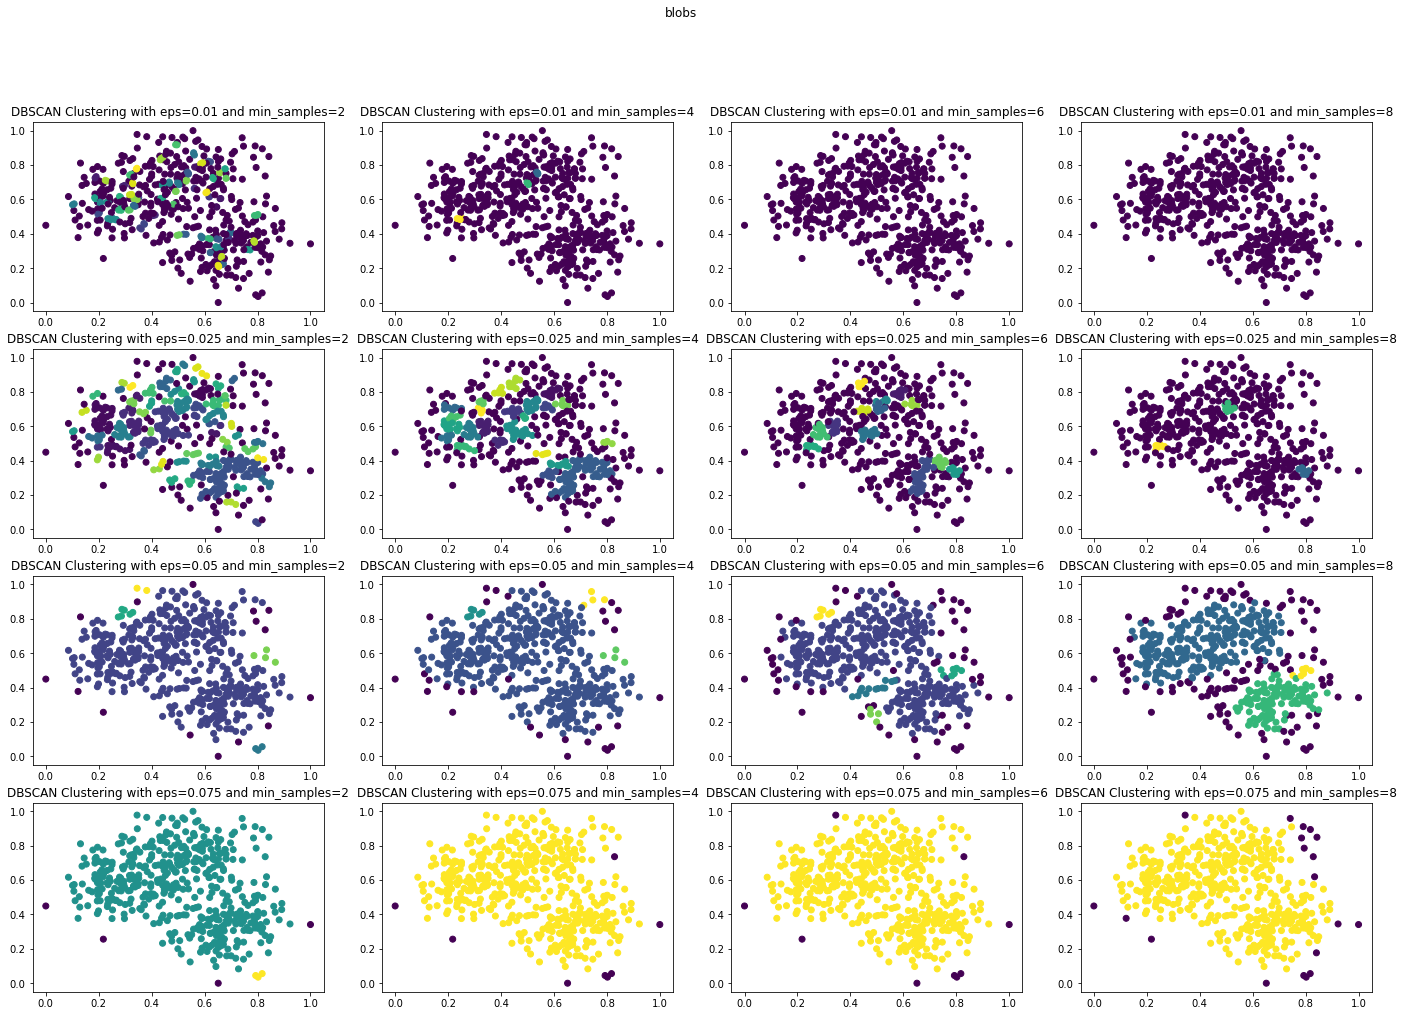

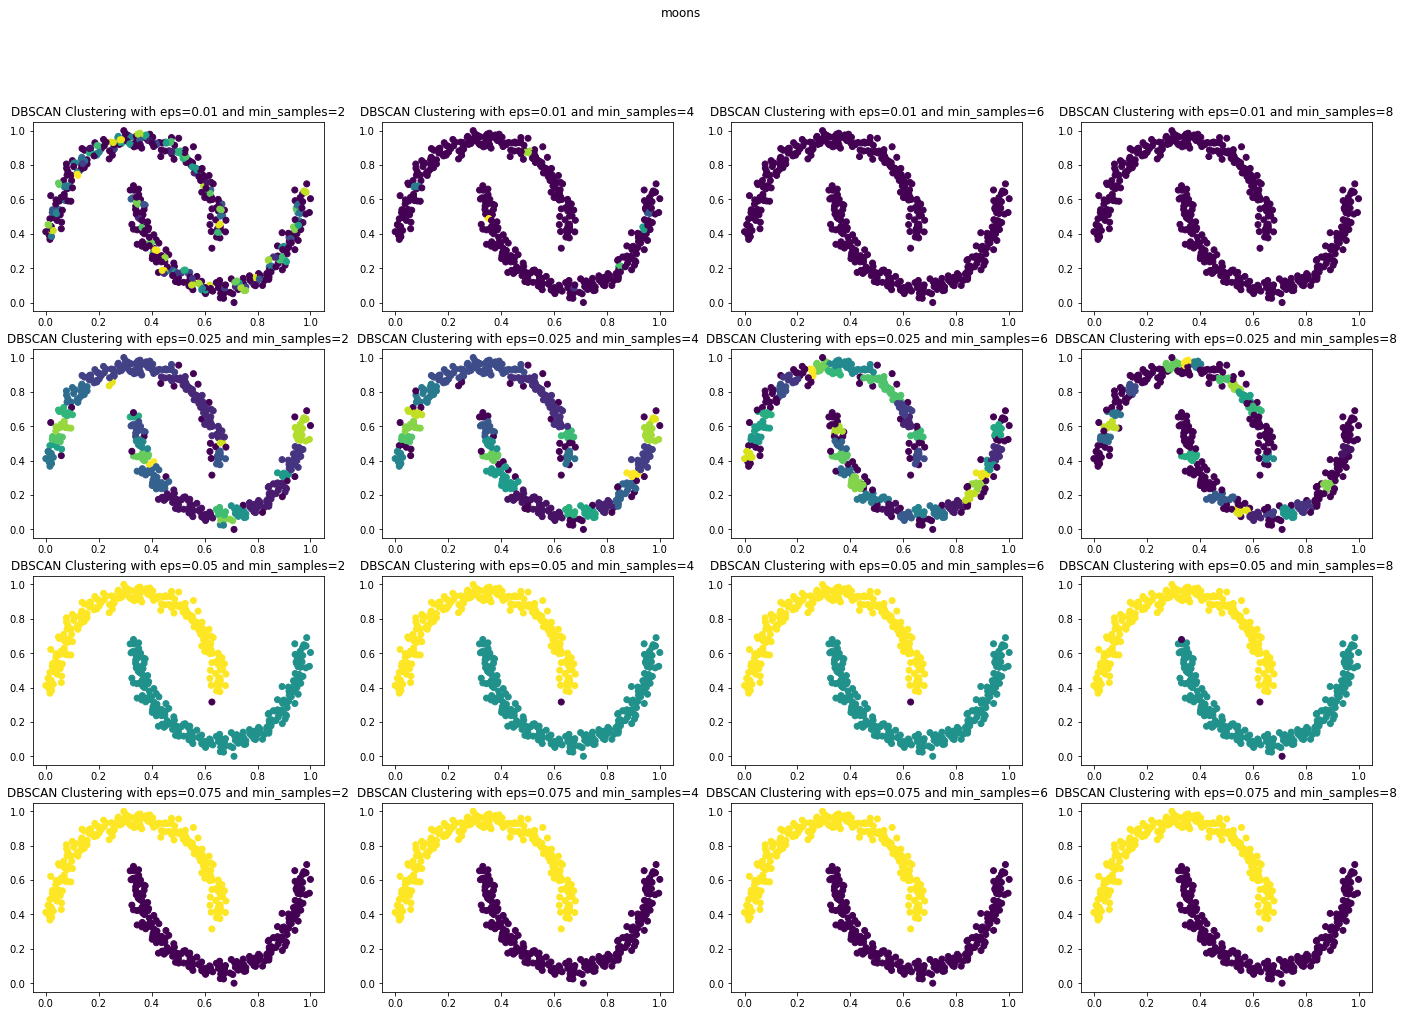

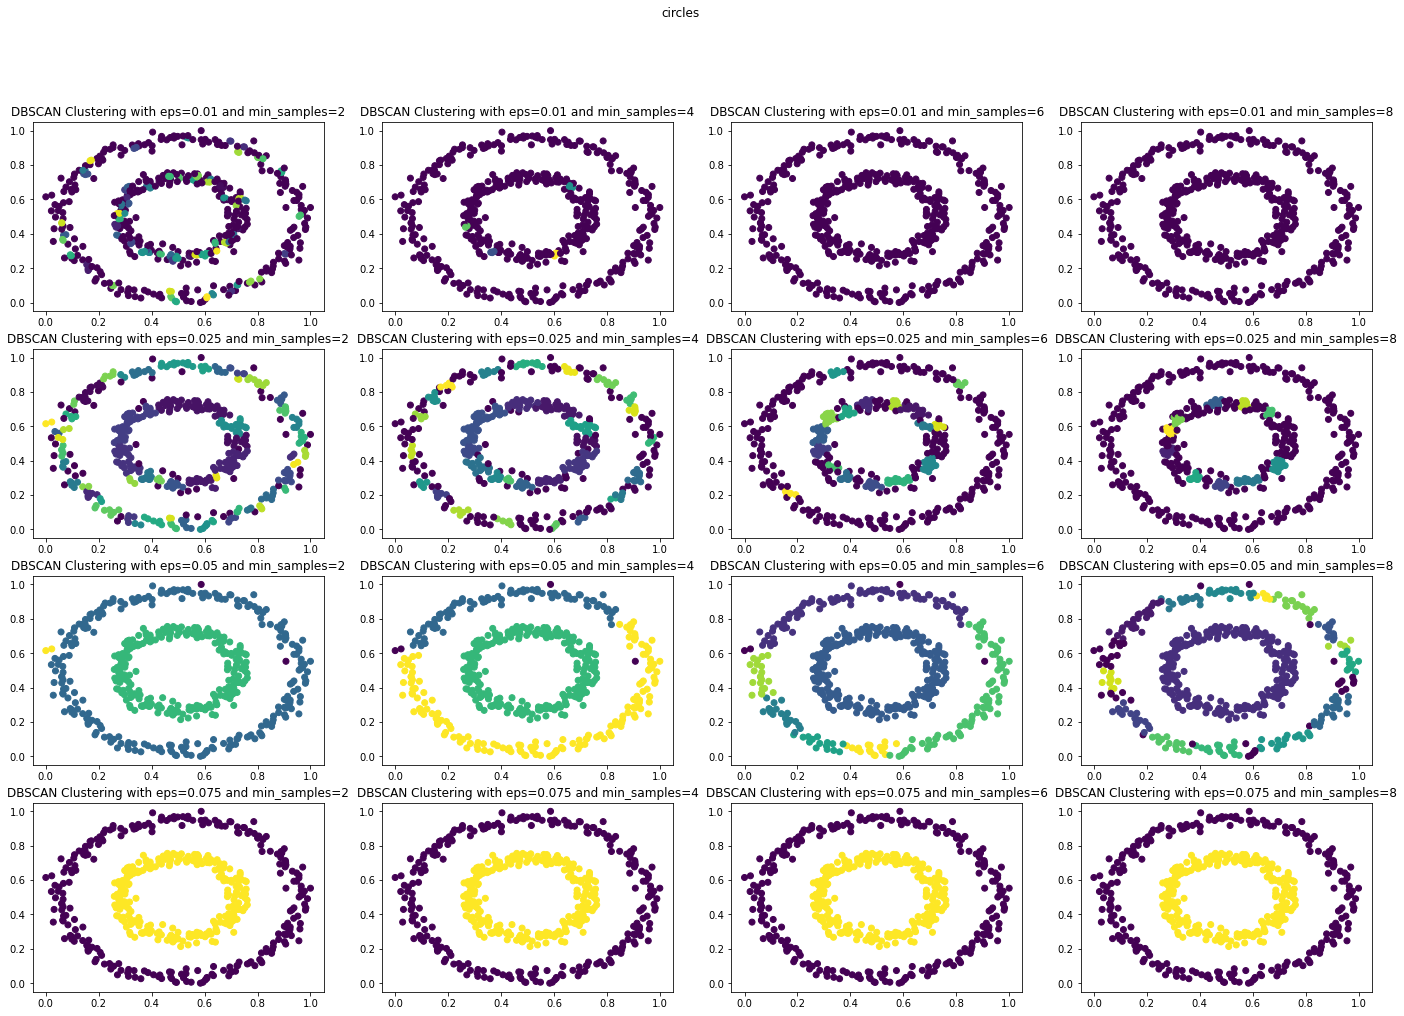

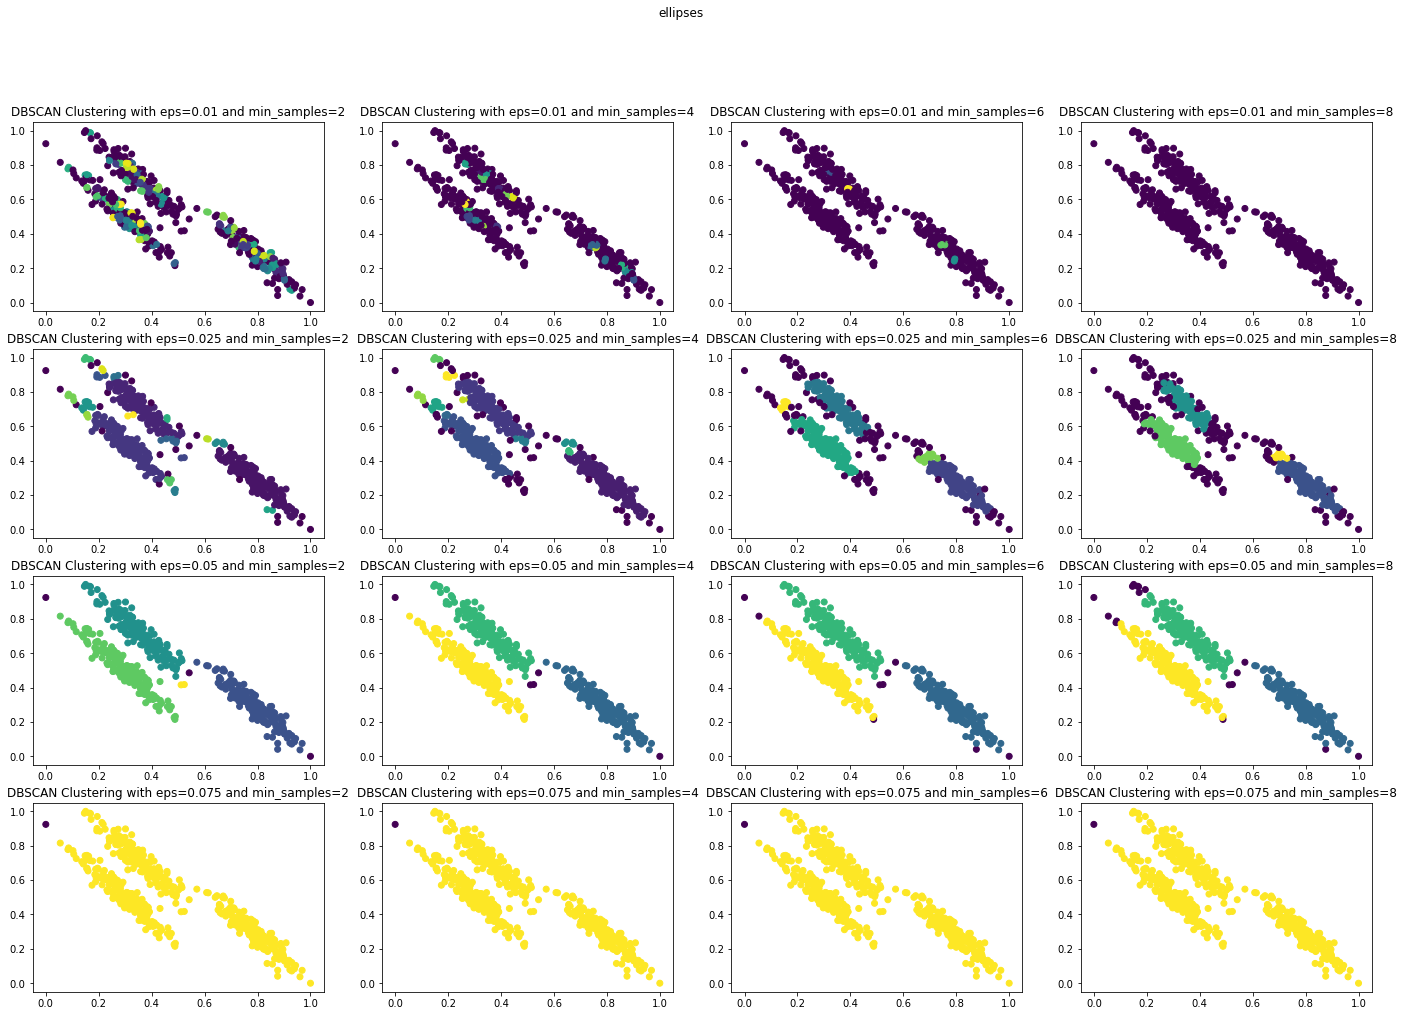

In [62]:
eps_list = [0.01, 0.025, 0.05, 0.075]
min_samples_list = [2, 4, 6, 8]

for i, (key, df) in enumerate(dfs.items()):
    fig, axs = plt.subplots(4, 4, figsize=(24, 16))
    
    fig.suptitle(key)
    
    for j, eps in enumerate(eps_list):
        for k, min_samples in enumerate(min_samples_list):
            ax = axs[j, k]
            dbscan(Xs[key], eps, min_samples, ax=ax)

# Zadanie 2

## Import bibliotek

In [63]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics

## Wczytanie danych

Pomocnicza funkcja, wczytująca i parsująca plik CSV. Funkcja zwraca nazwy kolumn oraz dane zawarte w pliku CSV z danymi

In [64]:
def extract_columns_and_data(content: str):
    lines = content.split('\n')
    
    column_names = []
    data = []
    
    for line in lines:
        if line.startswith("@ATTRIBUTE"):
            column = line.split()[1].strip()
            column_names.append(column)
        elif not line.startswith(("@RELATION", "@DATA", "%")) and line != '':
            data.append(list(map(float, line.split(','))))
    
    return column_names, data

Wczytujemy dane, a następnie tworzymy DataFrame

In [65]:
data_path = "dataset/banknotes.csv"

with open(data_path, 'r') as f:
    content = f.read()
    column_names, data = extract_columns_and_data(content)

df = pd.DataFrame(data, columns=column_names)

Zobaczmy, z jakimi danymi mamy do czynienia

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   counterfeit  200 non-null    float64
 1   Length       200 non-null    float64
 2   Left         200 non-null    float64
 3   Right        200 non-null    float64
 4   Bottom       200 non-null    float64
 5   Top          200 non-null    float64
 6   Diagonal     200 non-null    float64
dtypes: float64(7)
memory usage: 11.1 KB


In [67]:
df.head()

counterfeit  Length   Left  Right  Bottom   Top  Diagonal
0          0.0   214.8  131.0  131.1     9.0   9.7     141.0
1          0.0   214.6  129.7  129.7     8.1   9.5     141.7
2          0.0   214.8  129.7  129.7     8.7   9.6     142.2
3          0.0   214.8  129.7  129.6     7.5  10.4     142.0
4          0.0   215.0  129.6  129.7    10.4   7.7     141.8

## Normalizacja danych

Do normalizacji danych wykorzystamy `StandardScaler`. Z oryginalnego zbioru danych odrzucamy kolumnę `counterfeit`, która oznacza przyporządkowanie banknotu do odpowiedniej klasy (`counterfeit` lub `genuine`). Zostawiamy więc jedynie kolumny zawierające informacje o cechach banknotów.

In [68]:
features = ['Length', 'Left', 'Right', 'Bottom', 'Top', 'Diagonal']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Oszacowanie optymalnej liczby klastrów dla metody k-means 

### Metoda *elbow*

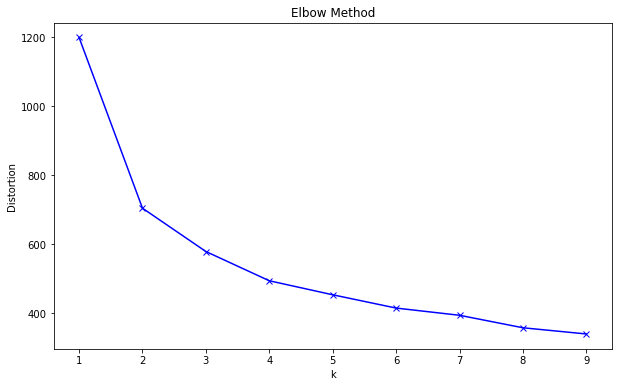

In [69]:
import matplotlib.pyplot as plt

distortions = []
K = range(1, 10)
for k in K:
    kmeans_model = KMeans(n_clusters=k, n_init=10)
    kmeans_model.fit(X_scaled)
    distortions.append(kmeans_model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

W przypadku metody łokcia (*elbow*), najlepszą konfigurację klastrów dostaniemy dla liczby klastrów, dla której na wykresie obserwujemy największe przegięcie. Dobrze to widać na otrzymanym wyżej wykresie i punktem, dla którego obserwujemy największą zmianę tempa spadku wartości, a więc największe przegięcie jest punkt dla $k=2$

### Metoda *silhouette score*

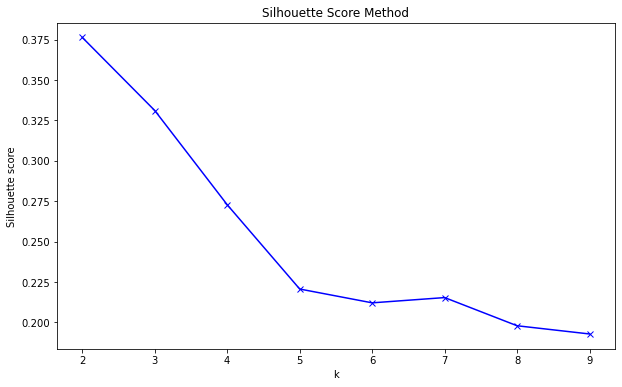

In [70]:
silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans_model = KMeans(n_clusters=k, n_init=10)
    kmeans_model.fit(X_scaled)
    silhouette_scores.append(metrics.silhouette_score(X_scaled, kmeans_model.labels_))

plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score Method')
plt.show()

W przypadku metody wyniku profilu (*silhouette score*), najlepszą konfigurację klastrów dostaniemy dla najwyższej wartości *silhouette score*. Możemy tę wartość odczytać z powyższego wykresu. Jak możemy zauważyć, najwyższy wynik dostaliśmy dla $k=2$, dlatego optymalna liczba klastrów to 2

### Metoda *Akaike Information Criterion*

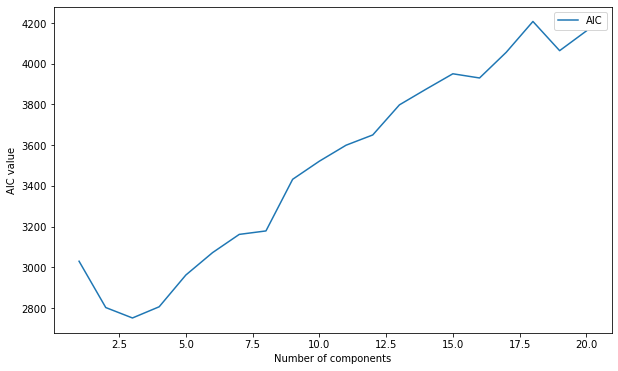

Best number of components: 3


In [74]:
from sklearn.mixture import GaussianMixture

n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_scaled) for n in n_components]

plt.figure(figsize=(10, 6))
plt.plot(n_components, [m.bic(X_scaled) for m in models], label='AIC')
plt.xlabel('Number of components')
plt.ylabel('AIC value')
plt.legend(loc='best')
plt.show()

best_n_components = np.argmin([m.bic(X_scaled) for m in models]) + 1

print(f'Best number of components: {best_n_components}')

W przypadku metody kryterium informacyjnego Akaikego (*Akaike Information Criterion*), najlepszą konfigurację klastrów dostaniemy dla liczy klastrów równej 3

## Sprawdzanie poprawności przypisania banknotów do klastrów dla metody DBSCAN

In [ ]:
dbscan = DBSCAN()
dbscan_labels = dbscan.fit_predict(X_scaled)

print(f'Number of clusters: {len(set(labels))}')
print(f'Number of outliers: {np.sum(labels == -1)}')

Number of clusters: 2
Number of outliers: 1


Jak możemy zauważyć, w przypadku, gdy korzystamy z domyślnych wartości parametrów metody kalsteryzacji DBSCAN (`eps=0.5` i `min_samples=5`), 1 banknot nie został poprawnie zaklasyfikowany

## Ocena jakości otrzymanych klastrów

W przypadku metody k-means wykorzystujemy uzyskaną wcześniej optymalną liczbę klastrów

In [106]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

# Klasteryzacja k-means
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans_clusters = kmeans.fit_predict(X_scaled)

# Klasteryzacja DBSCAN
dbscan = DBSCAN(eps=1.4, min_samples=2)
dbscan_clusters = dbscan.fit_predict(X_scaled)

# Obliczenie metryk
labels_true = df.iloc[:, 0]

homogeneity_kmeans = homogeneity_score(labels_true, kmeans_clusters)
homogeneity_dbscan = homogeneity_score(labels_true, dbscan_clusters)

completeness_kmeans = completeness_score(labels_true, kmeans_clusters)
completeness_dbscan = completeness_score(labels_true, dbscan_clusters)

v_measure_kmeans = v_measure_score(labels_true, kmeans_clusters)
v_measure_dbscan = v_measure_score(labels_true, dbscan_clusters)

# Wypisanie wyników
print("K-means:")
print(f"Homogeneity: {homogeneity_kmeans}")
print(f"Completeness: {completeness_kmeans}")
print(f"V-Measure: {v_measure_kmeans}")

print("\nDBSCAN:")
print(f"Homogeneity: {homogeneity_dbscan}")
print(f"Completeness: {completeness_dbscan}")
print(f"V-Measure: {v_measure_dbscan}")

K-means:
Homogeneity: 0.7942888437190893
Completeness: 0.7979767420525216
V-Measure: 0.7961285220549091

DBSCAN:
Homogeneity: 0.9055363998729483
Completeness: 0.6716045959848088
V-Measure: 0.7712213550766898


Na podstawie otrzymanych wyników wniosków, możemy dojść do następujących wniosków:

1. **K-means:**
   - *Homogenność* wynosi 0.7943, co oznacza, że każdy klaster zawiera tylko elementy z jednej klasy, co jest pożądaną cechą, ale nie osiągnięto maksymalnej wartości (1.0).
   - *Kompletność* wynosi 0.7980, co sugeruje, że większość elementów tej samej klasy została zebrana w jednym klastrze, ale jeszcze nie został osiągnięty stan idealny (1.0).
   - *Miara V* wynosi 0.7961, co jest średnią harmoniczną homogenności i kompletności. Wynik bliski 1.0 wskazuje na wyższą jakość grupowania. Wartość 0.7961 pokazuje, że metoda K-means ma dość dobrą jakość grupowania.

<br>

2. **DBSCAN:**
   - *Homogeniczność* wynosi 0.9055, co oznacza, że skupienia utworzone przez algorytm są czyste i zawierają podobne próbki. Jest to wysoka wartość, sugerująca dobrą separację klastrów.
   - *Completeness* wynosi 0.6716, co wskazuje, że większość punktów w każdym prawdziwym klastrze została poprawnie przypisana do odpowiedniego skupienia. Jednakże, wartość ta jest nieco niższa, co może sugerować pewne trudności w przypisywaniu niektórych punktów.
   - *Miara V* wynosi 0.7712, co jest miarą łączącą zarówno homogeniczność, jak i kompletność. Wartość ta wskazuje na dobrą jakość klasyfikacji, ale istnieje jeszcze pewien margines poprawy.

W oparciu o powyższe wyniki analizy, metoda K-means radzi sobie lepiej z dzieleniem na klastry w tym przypadku niż DBSCAN, co zobaczyć można poprzez wyższe wartości dla homogenności, kompletności oraz miary V.